<center><h1>Hou_Shengtao_HW7</h1></center>

Name: Shengtao Hou  
<br>
Github Username: Tonyhou521 
<br>
USC ID: 9712707229

Late Day : 1

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## train test split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import hamming_loss, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from tqdm import tqdm

### (a) Download the Anuran Calls (MFCCs) Data Set

In [76]:
df = pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")
display(df.head())

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [77]:
##choose 70% of the data randomly as the training set using train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
## reset the index of the training and test dataframes
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
display(train_df)
display(test_df)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,17
1,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407,Dendrobatidae,Ameerega,Ameeregatrivittata,13
2,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221,Hylidae,Hypsiboas,HypsiboasCinerascens,37
3,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
4,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006,Leptodactylidae,Adenomera,AdenomeraAndre,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5031,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
5032,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5033,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5034,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656,Hylidae,Hypsiboas,HypsiboasCinerascens,37


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.147506,0.014843,0.433466,0.169581,0.053135,-0.152020,-0.102427,0.153061,0.128628,...,0.285756,0.166246,-0.061206,-0.191878,0.003221,0.255371,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,21
1,1.0,0.674174,0.767520,0.392177,0.035669,0.181548,-0.013677,0.187262,0.144679,-0.424524,...,-0.157943,-0.048913,-0.016129,0.129200,0.011245,-0.275909,Hylidae,Hypsiboas,HypsiboasCinerascens,36
2,1.0,-0.007777,0.363276,0.413224,0.196296,0.222389,0.097128,-0.155608,-0.035013,0.133689,...,0.125169,0.044882,-0.013309,-0.026086,-0.088825,-0.018968,Hylidae,Hypsiboas,HypsiboasCordobae,43
3,1.0,0.429359,0.297881,0.609120,0.263991,-0.030414,-0.160778,0.076217,0.285909,0.052029,...,0.230330,0.069015,-0.101196,-0.152351,0.039065,0.233823,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
4,1.0,0.190599,0.062234,0.617262,0.208825,0.027108,-0.214441,0.009654,0.299053,0.039013,...,0.321598,0.128742,-0.152977,-0.223482,0.016131,0.250754,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,1.0,0.469993,0.342252,0.508362,0.184239,0.138370,-0.070231,0.034221,0.226367,-0.001120,...,0.186595,-0.080672,-0.104266,-0.077342,0.159712,0.239398,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,14
2155,1.0,0.162558,-0.115829,0.045608,0.226107,0.325952,0.157953,-0.124050,-0.009148,0.235613,...,-0.120102,-0.226043,-0.161989,0.037390,0.185305,0.059824,Leptodactylidae,Adenomera,AdenomeraAndre,4
2156,1.0,0.160219,0.137078,0.599525,0.252240,0.077200,-0.132288,-0.001605,0.244840,0.081377,...,0.275059,0.046851,-0.108847,-0.190397,-0.011276,0.217408,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
2157,1.0,0.523548,0.387887,0.539775,0.087532,0.028962,-0.025403,0.064718,0.215919,-0.005312,...,0.120708,-0.133983,-0.092651,0.011379,0.109798,0.100649,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,19


### (b) Train a classifier for each label

#### (i) Research

Exact match: This means every label of a sample must be exactly the same as its in data set. This is also known as a sample-based accuracy.

Exact match is a binary metric that evaluates whether the predicted class label for a given example is exactly the same as the true class label. If the predicted label matches the true label, the score is 1, otherwise it is 0. The exact match score is then the average of this score across all examples in the dataset.

Hamming Loss:: This is a label-based metric that counts each single miss-matched label rather than consider the lables of a sample as one.

Hamming loss, on the other hand, is a multiclass metric that measures the fraction of the labels that are incorrectly predicted. It takes into account the number of labels that are predicted incorrectly for each example, and averages this across all examples in the dataset. It is calculated as the average number of labels that are incorrect over all examples, normalized by the total number of labels in the dataset.

One can calculate Hamming loss by using 1 - Hamming Score

#### (ii) Train a SVM for each of the labels

In [78]:
X_train = train_df.drop(columns=['Family', 'Genus', 'Species', 'RecordID'])
train_family = train_df['Family']
train_genus = train_df['Genus']
train_species = train_df['Species']

X_test = test_df.drop(columns=['Family', 'Genus', 'Species', 'RecordID'])
test_family = test_df['Family']
test_genus = test_df['Genus']
test_species = test_df['Species']

In [94]:
## train a SVM for each of the labels, using gaussian kernal and one versus all classifiers,Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation

def SVM(X_train, y_train, X_test, y_test, min_accuracy_threshhold=0.7):
    # Define the minimum accuracy threshold

    # Train the SVM on the entire training data using various combinations of λ and σ
    # and find the extreme values that keep the accuracy above the threshold
    C_range = np.logspace(-3, 6, 10)
    gamma_range = np.linspace(0.1, 2, 20)

    valid_params = []
    print(len(C_range) * len(gamma_range), "combinations to test")
    for C in (C_range):
        for gamma in gamma_range:
            svm_model = SVC(kernel='rbf', C=C, gamma=gamma)
            clf = OneVsRestClassifier(svm_model)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_train)
            accuracy = accuracy_score(y_train, y_pred)
            
            if accuracy >= min_accuracy_threshhold:
                valid_params.append((C, gamma))

    # Set up the parameter range based on the extreme values found
    max_num_params = 20
    selected_params = valid_params[:max_num_params]

    C_params = [param[0] for param in selected_params]
    gamma_params = [param[1] for param in selected_params]

    parameters = {'estimator__C': C_params, 'estimator__gamma': gamma_params}
    svm = SVC(kernel='rbf')
    clf = OneVsRestClassifier(svm)
    grid_search = GridSearchCV(clf, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)

    # Train the model with the best parameters
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    # Evaluate the model
    y_pred = best_clf.predict(X_test)
    exact_match = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    
    return exact_match, hamming

In [95]:
SVM_family = SVM(X_train, train_family, X_test, test_family)

200 combinations to test


100%|██████████| 10/10 [02:17<00:00, 13.72s/it]


Exact match accuracy for family:  0.9666512274201019


In [142]:
print("Exact match accuracy for family: ", SVM_family[0])
print("Hamming loss for family: ", SVM_family[1])

Exact match accuracy for family:  0.9666512274201019
Hamming loss for family:  0.0333487725798981


In [96]:
SVM_genus = SVM(X_train, train_genus, X_test, test_genus)

200 combinations to test


100%|██████████| 10/10 [02:42<00:00, 16.20s/it]


Exact match accuracy for genus:  0.9564613246873552


In [143]:
print("Exact match accuracy for genus: ", SVM_genus[0])
print("Hamming loss for genus: ", SVM_genus[1])

Exact match accuracy for genus:  0.9564613246873552
Hamming loss for genus:  0.04353867531264474


In [97]:
SVM_species = SVM(X_train, train_species, X_test, test_species)

200 combinations to test


100%|██████████| 10/10 [02:55<00:00, 17.54s/it]


Exact match accuracy for species:  0.9583140342751274


In [144]:
print("Exact match accuracy for species: ", SVM_species[0])
print("Hamming loss for species: ", SVM_species[1])

Exact match accuracy for species:  0.9583140342751274
Hamming loss for species:  0.041685965724872626


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [110]:
from sklearn.svm import LinearSVC

def l1_svm(X_train, X_test, y_train, y_test):

    # Set up the parameter grid for the penalty weight
    parameters = {'estimator__C': np.logspace(-3, 6, 10)}

    # Use a linear SVM with L1 penalty
    svm = LinearSVC(penalty='l1', dual=False, max_iter=1000000)
    clf = OneVsRestClassifier(svm)
    grid_search = GridSearchCV(clf, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)

    # Train the model with the best parameters
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    # Evaluate the model
    y_pred = best_clf.predict(X_test)
    exact_match = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)

    return exact_match, hamming

In [112]:
l1_svm_family = l1_svm(X_train, X_test, train_family, test_family)
print("Exact match accuracy for family: ", l1_svm_family[0])
print("Hamming loss for family: ", l1_svm_family[1])

Exact match accuracy for family:  0.9282075034738305
Hamming loss for family:  0.07179249652616952


In [113]:
l1_svm_genus = l1_svm(X_train, X_test, train_genus, test_genus)
print("Exact match accuracy for genus: ", l1_svm_genus[0])
print("Hamming loss for genus: ", l1_svm_genus[1])

Exact match accuracy for genus:  0.9421028253821213
Hamming loss for genus:  0.05789717461787865


In [114]:
l1_svm_species = l1_svm(X_train, X_test, train_species, test_species)
print("Exact match accuracy for species: ", l1_svm_species[0])
print("Hamming loss for species: ", l1_svm_species[1])

Exact match accuracy for species:  0.9592403890690134
Hamming loss for species:  0.04075961093098657


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [123]:
from imblearn.over_sampling import SMOTE

def smote_svm(X_train, X_test, y_train, y_test):
    # Apply SMOTE to remedy class imbalance
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Set up the parameter grid for the penalty weight
    parameters = {'estimator__C': np.logspace(-3, 6, 10)}
    
    # Use a linear SVM with L1 penalty
    svm = LinearSVC(penalty='l1', dual=False, max_iter=1000000)
    clf = OneVsRestClassifier(svm)
    grid_search = GridSearchCV(clf, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)

    # Train the model with the best parameters
    grid_search.fit(X_train_smote, y_train_smote)
    best_clf = grid_search.best_estimator_

    # Evaluate the model
    y_pred = best_clf.predict(X_test)
    exact_match = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)

    return exact_match, hamming


In [124]:
l1_smote_svm_family = smote_svm(X_train, X_test, train_family, test_family)
print("Exact match accuracy for family: ", l1_smote_svm_family[0])
print("Hamming loss for family: ", l1_smote_svm_family[1])

Exact match accuracy for family:  0.9096804075961094
Hamming loss for family:  0.09031959240389069


In [125]:
l1_smote_svm_genus = smote_svm(X_train, X_test, train_genus, test_genus)
print("Exact match accuracy for genus: ", l1_smote_svm_genus[0])
print("Hamming loss for genus: ", l1_smote_svm_genus[1])

Exact match accuracy for genus:  0.9082908754052802
Hamming loss for genus:  0.09170912459471978


In [126]:
l1_smote_svm_species = smote_svm(X_train, X_test, train_species, test_species)
print("Exact match accuracy for species: ", l1_smote_svm_species[0])
print("Hamming loss for species: ", l1_smote_svm_species[1])

Exact match accuracy for species:  0.9592403890690134
Hamming loss for species:  0.04075961093098657



Family:

SVM: 
Exact match accuracy for family:  0.9666512274201019
Hamming loss for family:  0.0333487725798981

L1 Penalized: 
Exact match accuracy for family:  0.9282075034738305
Hamming loss for family:  0.07179249652616952

SMOTE with L1 Penalized: 
Exact match accuracy for family:  0.9096804075961094
Hamming loss for family:  0.09031959240389069

Genus:

SVM:
Exact match accuracy for genus:  0.9564613246873552
Hamming loss for genus:  0.0435386753126447

L1 Penalized: 
Exact match accuracy for genus:  0.9421028253821213
Hamming loss for genus:  0.05789717461787865

SMOTE with L1 Penalized: 
Exact match accuracy for genus:  0.9082908754052802
Hamming loss for genus:  0.09170912459471978

Species:

SVM:
Exact match accuracy for species:  0.9583140342751274
Hamming loss for species:  0.041685965724872626

L1 Penalized: 
Exact match accuracy for species:  0.9592403890690134
Hamming loss for species:  0.04075961093098657

SMOTE with L1 Penalized: 
Exact match accuracy for species:  0.9592403890690134
Hamming loss for species:  0.04075961093098657


Based on the results provided, it appears that the SVM model achieved the highest exact match accuracy for all three levels of classification (Family, Genus, Species). However, the L1 penalized model performed better in terms of hamming loss for both Family and Genus classifications, while the SMOTE with L1 Penalized model performed better in terms of hamming loss for the Species classification. This might be because SMOTE promotes the minority class by oversampling it, which can result in a lower accuracy score because the model may be biased towards the minority class. However, other metrics such as precision and recall may perform better because the oversampling can help the model better learn the patterns and characteristics of the minority class, which can result in better classification of instances from that class.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [130]:
X = df.drop(columns=['Family', 'Genus', 'Species', 'RecordID'])
y = df[['Family', 'Genus', 'Species']]

In [140]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tqdm

def MajorityLabels(bestK, clusterLabels, y):
    cluster_major = pd.DataFrame(columns=y.columns)
    for c in range(bestK):
        idx, = np.where(clusterLabels == c)
        cluster_samples = y.iloc[idx, :]
        row = []
        for label in y.columns:
            cur_major = cluster_samples.loc[:, label].value_counts().index[0]
            row.append(cur_major)
        cluster_major.loc[c] = row
    return cluster_major

def choose_optimal_k(X, max_k=50):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        silhouette = silhouette_score(X, labels)
        silhouette_scores.append(silhouette)

    optimal_k = np.argmax(silhouette_scores) + 2
    return optimal_k

def eval_metrics(major, labels, y):
    missclf_labels = 0
    for c in range(len(major)):
        idx, = np.where(labels == c)
        for label in y.loc[idx].values:
            miss = (label != major.loc[c].values)
            missclf_labels += np.sum(miss)
    hamming_dist = missclf_labels / y.shape[0]
    hamming_loss = missclf_labels / (y.shape[0] * y.shape[1])
    return hamming_dist, hamming_loss

def monte_carlo(X, y, n_runs=50):
    hamming_distances = list()
    hamming_loss_arr = list()
    optimal_k = choose_optimal_k(X)

    for i in tqdm.tqdm(range(n_runs)):
        kmeans = KMeans(n_clusters=optimal_k, random_state=42)
        clusters = kmeans.fit_predict(X)
        majority = MajorityLabels(optimal_k, clusters, y)

        if i ==0:
            print(majority)
        

        
        # Evaluate the clustering
        hamming_dist, temp_hamming_loss = eval_metrics(majority, clusters, y)
        hamming_distances.append(hamming_dist)
        hamming_loss_arr.append(temp_hamming_loss)

    # Calculate the average and standard deviation of the Hamming distances
    avg_hamming_dis = np.mean(hamming_distances)
    std_hamming_dis = np.std(hamming_distances)

    # Calculate the average and standard deviation of the Hamming loss
    avg_hamming_loss = np.mean(hamming_loss_arr)
    std_hamming_loss = np.std(hamming_loss_arr)

    ##Calculate the average and standard deviation of the Hamming Scores
    avg_hamming_score = 1 - avg_hamming_loss
    std_hamming_score = std_hamming_loss


    ## summarize them in a dataframe
    temp = pd.DataFrame({'Hamming Distance': [avg_hamming_dis, std_hamming_dis],
                          'Hamming Loss': [avg_hamming_loss, std_hamming_loss],
                            'Hamming Score': [avg_hamming_score, std_hamming_score]},
                        index=['Average', 'Standard Deviation'])
    
    return temp


In [141]:
monte_carlo(X,y)

  2%|▏         | 1/50 [00:00<00:36,  1.35it/s]

            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas       HypsiboasCordobae
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3    Dendrobatidae   Ameerega      Ameeregatrivittata


100%|██████████| 50/50 [00:28<00:00,  1.74it/s]


,Hamming Distance,Hamming Loss,Hamming Score
Average,6.672689e-01,0.222423,0.777577
Standard Deviation,2.220446e-16,0.000000,0.000000


### (b) Determine which family is the majority

For each of the four clusters: the majority class for each label are shown above

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

See above xD

## 3. ISLR 12.6.2

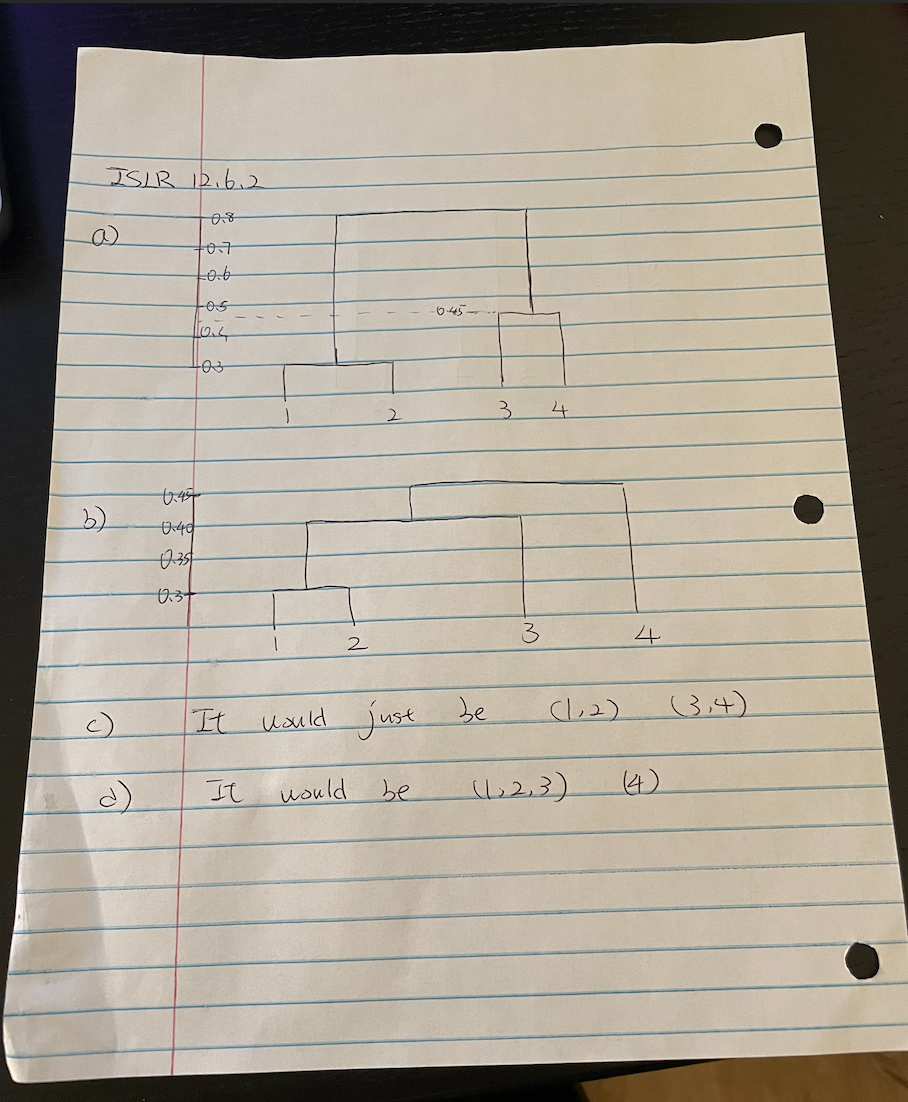

In [128]:
## show pictures in the folder
from IPython.display import Image
Image(filename='/Users/lucast/Desktop/APDS/Spring2023/DSCI552/HW/HW7/Screenshot 2023-04-07 at 12.59.16 AM.png')

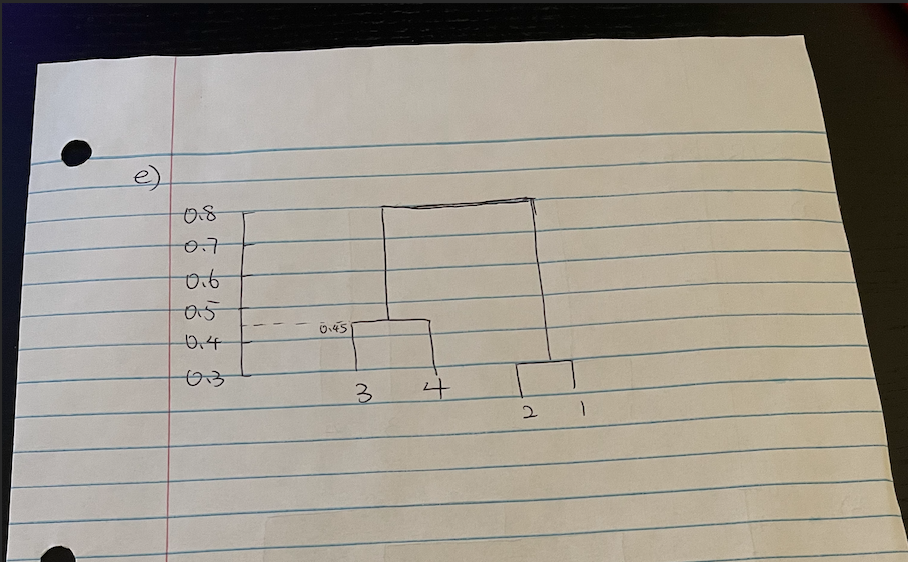

In [129]:
Image(filename='/Users/lucast/Desktop/APDS/Spring2023/DSCI552/HW/HW7/Screenshot 2023-04-07 at 12.58.59 AM.png')